# Questionnaire: Section 1 of 2
Before starting to use the iRONs Notebooks could you please answer the questions of Section 1 of 2 of this questionnaire? 
Please do not answer the questions of Section 2 of 2 but keep the questionnaire open until you are done with all the Notebooks, then you will be asked to answer Section 2 of 2. 
https://forms.gle/wPVHMhdH5qmTnWf36

The questionnaire aims to evaluate the efficacy of iRONs in communication some technical concepts of hydrological modelling and water reservoir operation


# Sound wave example

# 1. Import libraries
To run some of the tools offered by Python we need to import libraries (or toolboxes). Most of them come installed with the Anaconda package, so we only need to import running the code below (NOTE 1: in order to run the code in the box below, place the mouse pointer in the cell, then click on “run cell” button above or press shift + enter) (NOTE 2: if after executing the code, you get an "ImportError” message, it means you need to install some missing libraries – see [this link](../0%20-%20Tutorials/0.b%20-%20How%20to%20install%20libraries.ipynb) for help):

In [1]:
# Library for scientific computing
import numpy as np
# Libraries for visualization
import ipywidgets as widgets
from ipywidgets import FloatSlider, VBox
from IPython.display import display, Audio, clear_output
from bqplot import pyplot as plt
from bqplot import Axis
from bqplot import LinearScale
from bqplot import pyplot as plt
from bqplot.traits import *

warnings.filterwarnings('ignore') # to ignore warning messages

# 2. Data
<left><img src="Videos/Standing_wave.gif" width="400px">

In this example we will define and then plot a sound wave which can be represented as a sine curve with a certain amplitude, phase and frequency using the following equation:

$y(x) = A \sin(2 \pi(\nu x + \phi ))$

where

$A = amplitude$

$\phi = phase$

$\nu = frequency$



### Definition of the sine curve
In the cell below we use three variables to define the initial values of the parameters amplitude, phase and frequency, a vector *x* to define the points at which the curve will be evaluated, and a vector *y(x)* to define the curve. For this purpose, we use some of the functions of the imported Numpy library, e.g. *np.linspace* to generate evenly spaced numbers over a specified interval or *np.pi* to get the value of π.

In [2]:
amp = 10 # amplitude
phase = 1 # phase
freq = 10 # frequency
x = np.linspace(0,1,500) # x axis from 0 to 1 with a 1/500 step
y = amp * np.sin(2 * np.pi * (freq * x + phase))

# 3. Visualization of the data
### Plot of the curve
Using the imported visualization libraries we can now plot the sine curve using the parameter values (amplitude, phase and frequency) defined in the cell above.

In [3]:
# First, let's create a scale for the x attribute, and a scale for the y attribute
x_sc_1 = LinearScale(min=0,max=1)
y_sc_1 = LinearScale(min=-20,max=20)
# Then we can define some of the features of the plot axes such as their labels.
x_ax_1 = Axis(label='x', scale=x_sc_1)
y_ax_1 = Axis(label='y', scale=y_sc_1, orientation='vertical')
# Finally we can define other additional features of the figure and plot the sine curve
fig_1 = plt.figure(scales={'x': x_sc_1, 'y': y_sc_1}, axes=[x_ax_1, y_ax_1], title = 'Sine curve', 
                   layout={'min_width': '1000px', 'max_height': '300px'})
sin_wave_1 = plt.plot(x,y) # Plot the sine curve
fig_1

Figure(axes=[Axis(label='x', scale=LinearScale(max=1.0, min=0.0)), Axis(label='y', orientation='vertical', sca…

### Excercise 1
We will now import a sound wave (displayed in a black curve) and look at how the sine curve (blue) compare to it. The goodness-of-fit between the two curves will be quantified by the root mean square error (RMSE)

In [4]:
# Black curve
from sound_wave import sound_wave

xk,yk = sound_wave()

#RMSE
RMSE = np.sqrt((y - yk) ** 2).mean()

# Plot
fig_2 = plt.figure(scales={'x': x_sc_1, 'y': y_sc_1}, axes=[x_ax_1, y_ax_1], title = 'RMSE = '+str("%.2f" % RMSE), 
                   layout={'min_width': '1000px', 'max_height': '300px'}, animation_duration = 1000)
sine_curve_2 = plt.plot(x,y)
plt.plot(xk,yk,'k')
fig_2

Figure(animation_duration=1000, axes=[Axis(label='x', scale=LinearScale(max=1.0, min=0.0), side='bottom'), Axi…

Now you can change the values of amplitude, phase and frequency in the code cell below, trying to better fit the black curve (that is, to achieve RMSE = 0). Remember to run the cell after changing the values, so that you can see the changes in the figure above.

In [5]:
amp = 5
phase = 1
freq = 10

###############################################
sine_curve_2.y = amp * np.sin(2 * np.pi * (freq * x + phase))

RMSE = np.sqrt(((amp * np.sin(2 * np.pi * (freq * x + phase)) - yk) ** 2).mean())
fig_2.title = 'RMSE = '+str("%.2f" % RMSE)

### Excercise 2:
Try to do the same but now using the sliders (execute the cell code below to make the slider appears). Much easier, isn't it?.

In [6]:
def update_sine_curve(x,amp,freq,phase):
    sine_curve = amp * np.sin(2 * np.pi * (freq * x + phase))
    RMSE = np.sqrt(((sine_curve - yk) ** 2).mean())
    return sine_curve,RMSE

def update_figure(change):
    sine_curve.y = update_sine_curve(x,amp.value,freq.value,phase.value)[0]
    RMSE = update_sine_curve(x,amp.value,freq.value,phase.value)[1]
    if RMSE == 0:
        fig_3.title = 'RMSE = ' +str("%.2f" % RMSE)+' Well done!!!'
    else:
        fig_3.title = 'RMSE = ' +str("%.2f" % RMSE)
    
amp = widgets.FloatSlider(min=1,max=15,value=8, description = 'Amplitude: ')
amp.observe(update_figure,'value')
phase = widgets.FloatSlider(min=0,max=1,value=0.5, description = 'Phase: ')
phase.observe(update_figure,'value')
freq = widgets.FloatSlider(min=1,max=10,value=5.5, description = 'Frequency: ')
freq.observe(update_figure,'value')

# First, let's create a scale for the x attribute, and a scale for the y attribute
x_sc = plt.LinearScale(min=0,max=1)
y_sc = plt.LinearScale(min=-20,max=20)
# Then we can define some of the features of the plot axes such as their labels.
x_ax = plt.Axis(label='x', scale=x_sc)
y_ax = plt.Axis(label='y', scale=y_sc, orientation='vertical')
fig_3 = plt.figure(scales={'x': x_sc, 'y': y_sc}, axes=[x_ax, y_ax], 
                   title = 'RMSE = '+str("%.2f" % update_sine_curve(x,amp.value,freq.value,phase.value)[1]), 
                   layout={'min_width': '900px', 'max_height': '300px'}, animation_duration = 1000)
sine_curve = plt.plot(x,update_sine_curve(x,amp.value,freq.value,phase.value)[0])
plt.plot(xk,yk,'k', label = 'sound wave')
plt.xlim(0,1)
plt.ylim(-20,20)
sine_curve.observe(update_figure, ['x', 'y'])
widgets.VBox([amp, freq, phase,fig_3])

### Exercise 3
How about not only plotting but also listenting to your curve? Check whether you have **"super hearing"** and you can hear sounds with frequencies lower than 20Hz (human audible spectrum = 20-20000 Hz). After changing the value of wave frequency remember to click on the Play button below to hear the sound.

<IPython.core.display.Javascript object>


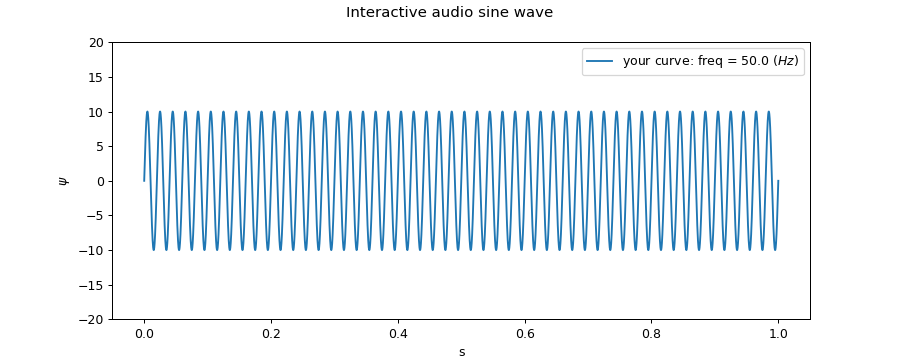

interactive(children=(FloatSlider(value=50.0, description='Frequency (Hz): ', layout=Layout(width='1000px'), m…

In [7]:
%matplotlib nbagg
import matplotlib.pyplot as plt
fig_4, ax = plt.subplots(1, figsize= (10,4))
plt.suptitle('Interactive audio sine wave')
def interactive_audio_wave(freq):
    x = np.linspace(0,1,44100) # x axis from 0 to 1 with a 1/500 step
    y = 10 * np.sin(2 * np.pi * (freq * x + 1))
    display(Audio(y, rate=44100)) 

    ax.clear()
    units = 'freq = {} $(Hz)$'
    
    ax.plot(x,y, label='your curve: '+units.format(freq))
    ax.set_xlabel('s')
    ax.set_ylabel('$\psi$')
    ax.set_ylim(-20,20)
    ax.legend(loc=1)
    fig_4
  
freq = widgets.FloatSlider(min=1,max=200,value=50, description = 'Frequency (Hz): ',style = {'description_width': '300px'} ,
                           layout={'width': '1000px'})

widgets.interactive(interactive_audio_wave, freq=freq)

#### Let's go to the next section!: [Calibration and evaluation of a rainfall-runoff model](../2%20-%20Hydrological%20modelling/2.a%20-%20Calibration%20and%20evaluation%20of%20a%20rainfall-runoff%20model.ipynb)